In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Exploratory Data Analysis

In [35]:
# load the data and read the first few rows 
data = pd.read_csv('Customer Churn.csv', na_values = "unknown")
data.head()

,age,job,marital,education,default,balance,housing,loan,communication type,day,month,duration,campaign,ndays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


In [36]:
# check the data type and any missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age                   11162 non-null int64
job                   11092 non-null object
marital               11162 non-null object
education             10665 non-null object
default               11162 non-null object
balance               11162 non-null int64
housing               11162 non-null object
loan                  11162 non-null object
communication type    8816 non-null object
day                   11162 non-null int64
month                 11162 non-null object
duration              11162 non-null int64
campaign              11162 non-null int64
ndays                 11162 non-null int64
previous              11162 non-null int64
poutcome              2836 non-null object
deposit               11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [37]:
# inspect missing values
data.isnull().sum()

age                      0
job                     70
marital                  0
education              497
default                  0
balance                  0
housing                  0
loan                     0
communication type    2346
day                      0
month                    0
duration                 0
campaign                 0
ndays                    0
previous                 0
poutcome              8326
deposit                  0
dtype: int64

In [38]:
# check the unique values of each variable
data.nunique()

age                     76
job                     11
marital                  3
education                3
default                  2
balance               3805
housing                  2
loan                     2
communication type       2
day                     31
month                   12
duration              1428
campaign                36
ndays                  472
previous                34
poutcome                 3
deposit                  2
dtype: int64

In [39]:
print(data['job'].value_counts(normalize=True).round(3))
print('\n')
print(data['education'].value_counts(normalize=True).round(3))
print('\n')
print(data['communication type'].value_counts(normalize=True).round(3))
print('\n')
print(data['poutcome'].value_counts(normalize=True).round(3))

management       0.231
blue-collar      0.175
technician       0.164
admin.           0.120
services         0.083
retired          0.070
self-employed    0.037
student          0.032
unemployed       0.032
entrepreneur     0.030
housemaid        0.025
Name: job, dtype: float64


secondary    0.513
tertiary     0.346
primary      0.141
Name: education, dtype: float64


cellular     0.912
telephone    0.088
Name: communication type, dtype: float64


failure    0.433
success    0.378
other      0.189
Name: poutcome, dtype: float64


For the 4 columns with unknown values, here is my rationale for the treatment. 

job, education and communication type: impute with the most frequent value (mode) 

poutcome: 80% are unknowns which is an extremely high proportion. From business understanding, they may not have received any marketing campaign from before, hence it's an unknown outcome. In this case, we can replace them with "not applicable" 

In [43]:
data[['poutcome']] = data[['poutcome']].fillna(value='not applicable')

# verify it was replaced correctly
print(data.isnull().sum())

age                      0
job                      0
marital                  0
education              497
default                  0
balance                  0
housing                  0
loan                     0
communication type    2346
day                      0
month                    0
duration                 0
campaign                 0
ndays                    0
previous                 0
poutcome                 0
deposit                  0
dtype: int64


In [42]:
data[['job']] = data[['job']].fillna(value = data['job'].value_counts().index[0])

print(data.isnull().sum())

age                      0
job                      0
marital                  0
education              497
default                  0
balance                  0
housing                  0
loan                     0
communication type    2346
day                      0
month                    0
duration                 0
campaign                 0
ndays                    0
previous                 0
poutcome              8326
deposit                  0
dtype: int64


In [44]:
columns = ['job', 'education', 'communication type']

for col in columns: 
    data[[col]] = data[[col]].fillna(value = data[col].value_counts().index[0])

# Count the number of NaNs in the dataset to verify 
print(data.isnull().sum())

age                   0
job                   0
marital               0
education             0
default               0
balance               0
housing               0
loan                  0
communication type    0
day                   0
month                 0
duration              0
campaign              0
ndays                 0
previous              0
poutcome              0
deposit               0
dtype: int64


no     0.527
yes    0.473
Name: housing, dtype: float64


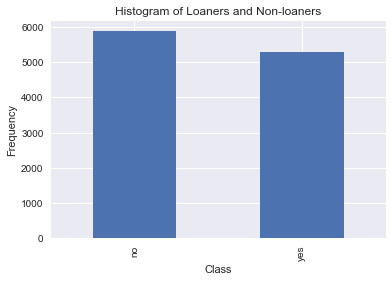

In [47]:
# check the target incidence
print(data.housing.value_counts(normalize=True).round(3))

# plot it out 
data.housing.value_counts().sort_index().plot(kind='bar')
plt.title("Histogram of Loaners and Non-loaners")
plt.xlabel("Class")
plt.ylabel("Frequency")

This is a pretty balanced data set. Next let's do some deep dive into the EDA variables to understand the correlation of variables and the data better.

**Data Exploration Deep Dive**

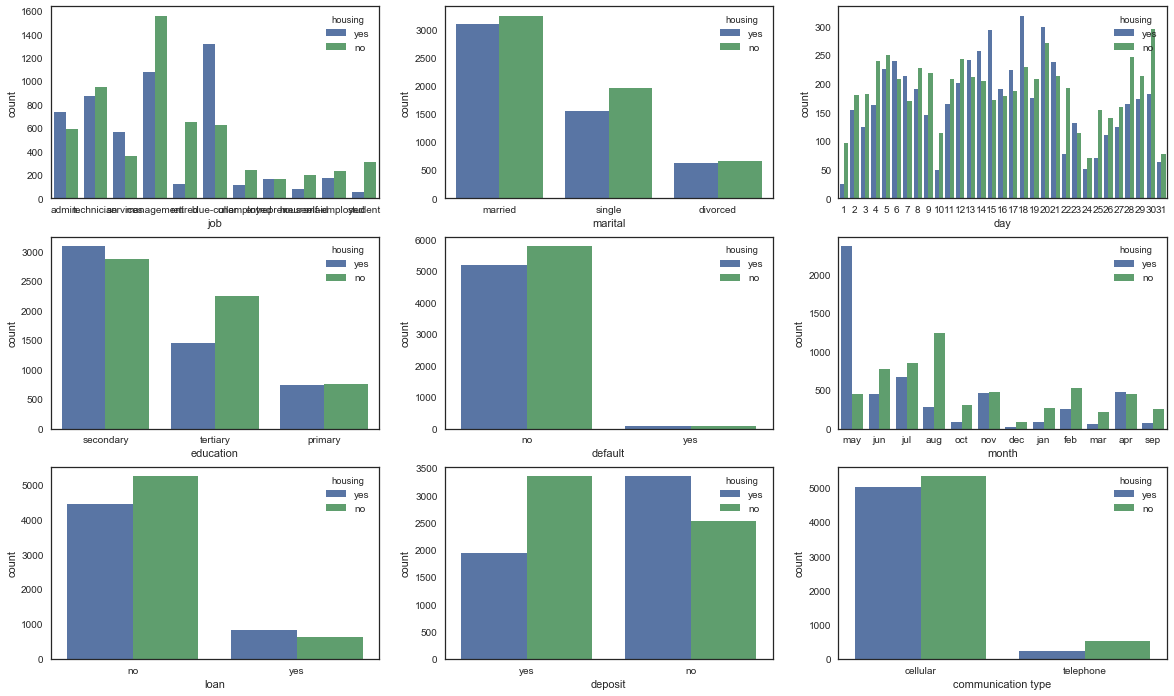

In [59]:
# we first review the 'Exited' relationships with the categorical variables
fig, ax = plt.subplots(3, 3, figsize=(20, 12))
sns.countplot(x='job', hue = 'housing',data = data, ax=ax[0][0])
sns.countplot(x='marital', hue = 'housing',data = data, ax=ax[0][1])
sns.countplot(x='education', hue = 'housing',data = data, ax=ax[1][0])
sns.countplot(x='default', hue = 'housing',data = data, ax=ax[1][1])
sns.countplot(x='loan', hue = 'housing',data = data, ax=ax[2][0])
sns.countplot(x='deposit', hue = 'housing',data = data, ax=ax[2][1])
sns.countplot(x='day', hue = 'housing',data = data, ax=ax[0][2])
sns.countplot(x='month', hue = 'housing',data = data, ax=ax[1][2])
sns.countplot(x='communication type', hue = 'housing',data = data, ax=ax[2][2]);

We can make a couple of observations: 
* A high proportion of customers with blue-collar jobs have housing loans, meanwhile there is a significant portion of management roles who don't 
* Single customers tend to not own a housing loan (which makes sense) 
* Interestingly, customers with tertiary education tend to not have a housing loan 
* Customers with no credit default tend to have a housing loan 
* Customers with no personal loans tend to also not have a housing loan. On the other hand, the relationship is negative with regards to term deposits. Customers with no term deposits tend to have a housing loan while those with a term deposit tend to not have a housing loan. 
* In terms of communication, customers who have a housing loan typically are contacted mid-month and a pretty significant portion is contacted in May. Communication type did not matter that much

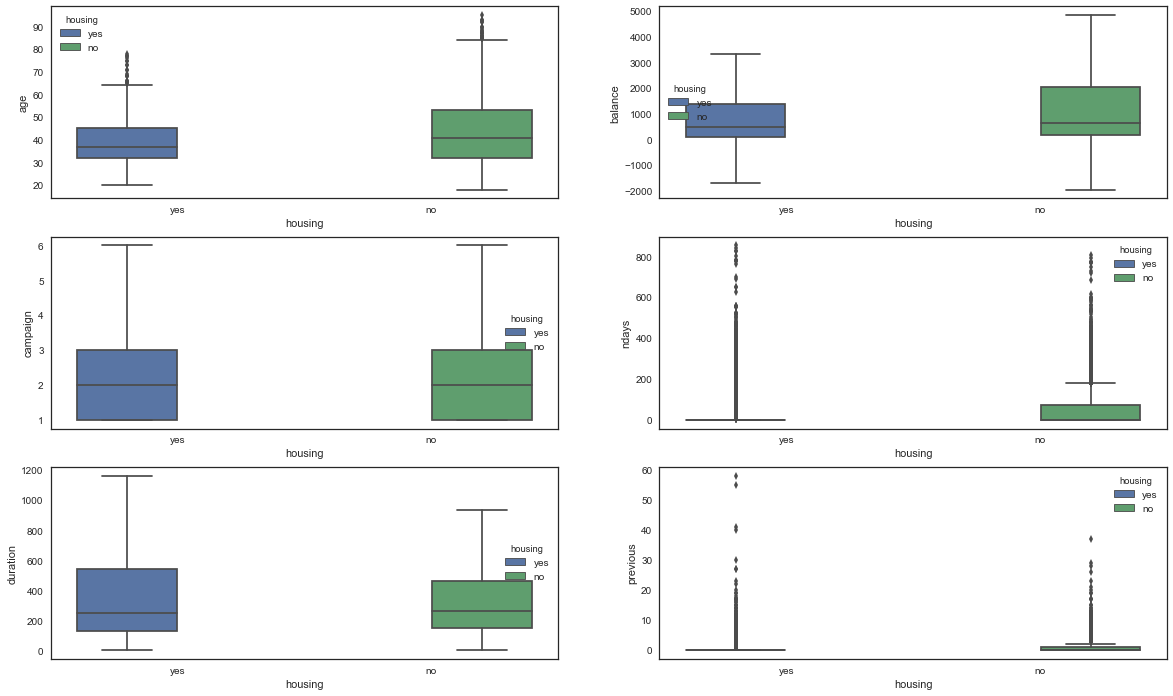

In [67]:
# next we look at the relationship between 'Exited' and the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='age',x = 'housing', hue = 'housing',data = data, ax=axarr[0][0])
sns.boxplot(y='balance',x = 'housing', hue = 'housing',data = data , ax=axarr[0][1], showfliers = False)
sns.boxplot(y='campaign',x = 'housing', hue = 'housing',data = data, ax=axarr[1][0], showfliers = False)
sns.boxplot(y='ndays',x = 'housing', hue = 'housing',data = data, ax=axarr[1][1])
sns.boxplot(y='duration',x = 'housing', hue = 'housing', data = data, ax=axarr[2][0], showfliers = False)
sns.boxplot(y='previous',x = 'housing', hue = 'housing',data = data, ax=axarr[2][1])

We can make the following deductions: 
* Customers with housing loans tend to be younger (30-45) than those without (40-55) 
* Customers with higher balance tend to not have housing loans 
* Customers with housing loans tend to have a longer contact duration than those without 
* Campaign, ndays and previous don't seem to have a significant impact on having a housing loan

# 2. Data Preprocessing & Feature Engineering

After handling the missing values and doing EDA, we need to do the necessary data preprocessing before building our model. There are 3 main tasks: 1) one hot encoding on categorical variables 2) split data 3) convert non-numeric data into numeric 4) scale features to a uniform range

In [87]:
# convert all the categorical object variables into dummy variables
data_dummies = data.copy()
data_dummies = pd.get_dummies(data_dummies.drop(['housing'], axis=1))
data_dummies.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'ndays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'loan_no', 'loan_yes', 'communication type_cellular',
       'communication type_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_not applicable', 'poutcome_other', 'poutcome_success',
       'deposit_no', 'deposit_yes'],
      dtype='object')

In [88]:
df = pd.concat([data_dummies, data.housing], axis=1)
df.head()

,age,balance,day,duration,campaign,ndays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_not applicable,poutcome_other,poutcome_success,deposit_no,deposit_yes,housing
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,yes
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,no
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,yes
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,yes
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,no


In [90]:
# split data into features and label 
y = df['housing'].values
X = df.drop(['housing'], axis=1).values

In [91]:
# split data into train and test sets with sklearn
from sklearn.model_selection import train_test_split

# split into train/test sets with sameb class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder() 

y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

In [94]:
X_train[0]

array([  25, -375,   14,   61,    2,   -1,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          1,    0,    1,    0,    1,    0,    1,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    1,    0], dtype=int64)

In [95]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# instantiate MinMaxScaler and use it to rescale X_train and test 
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [98]:
X_train_norm[0]

array([ 0.09333333,  0.07350286,  0.43333333,  0.01814826,  0.02380952,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ])

# 3. Model Prediction and Evaluation

In [135]:
# Support functions
from sklearn.decomposition import PCA

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Scoring functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [119]:
def evaluate(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1-score': f1_score(y_true, y_pred, average='weighted'),
        'roc_auc': roc_auc_score(y_true, y_pred)
    }

In [128]:
# train and fit a model with Logistic Regression
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train_norm, y_train)

# evaluate metrics
y_pred = model_lr.predict(X_test_norm)
evaluate(y_test, y_pred)

{'accuracy': 0.74473802060008953,
 'f1-score': 0.74460943803775814,
 'precision': 0.74457784358048151,
 'recall': 0.74473802060008953,
 'roc_auc': 0.74354821580288877}

Axes(0.125,0.125;0.775x0.755)


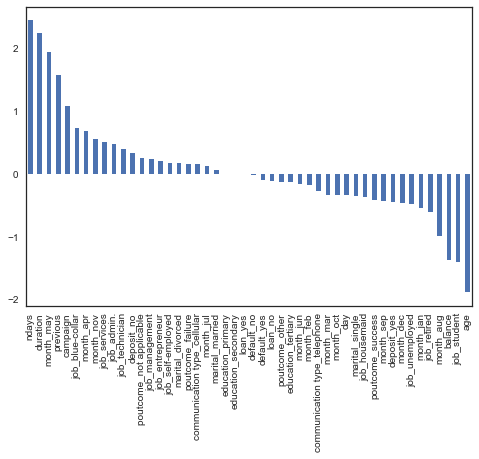

In [104]:
# get the importance of variables
weights = pd.Series(model_lr.coef_[0],
                 index=df.drop(['housing'], axis=1).columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'));

In [136]:
# train and fit a model with Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train_norm, y_train)

# evaluate metrics
y_pred = model_rf.predict(X_test_norm)
evaluate(y_test, y_pred)

{'accuracy': 0.67711598746081503,
 'f1-score': 0.67052744373261641,
 'precision': 0.70640328813420394,
 'recall': 0.67711598746081503,
 'roc_auc': 0.68548658312092892}

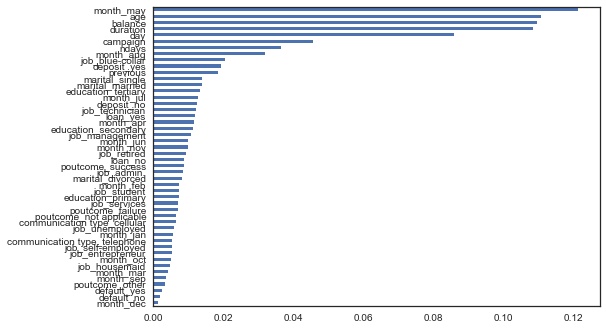

In [137]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=df.drop(['housing'], axis=1).columns.values)
weights.sort_values().plot(kind = 'barh')

100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


,accuracy,precision,recall,f1-score,roc_auc,model
0,0.8050,0.777133,0.8050,0.781501,0.614177,LogReg
1,0.8100,0.786250,0.8100,0.790682,0.631949,KNN
2,0.8030,0.789779,0.8030,0.794915,0.660482,NB
3,0.7755,0.788684,0.7755,0.781299,0.682548,DTC
4,0.8390,0.832306,0.8390,0.834975,0.728812,ADB
5,0.8475,0.836206,0.8475,0.838233,0.714941,RFC
6,0.8560,0.847128,0.8560,0.849208,0.737654,GBC
7,0.8345,0.827186,0.8345,0.830091,0.720499,XGB


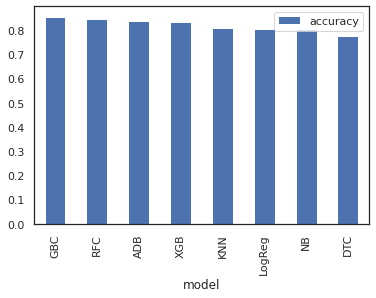

In [66]:
def model_selection(X_train, X_test, y_train, y_test, models):
    results = []
    for name, model in tqdm(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result = evaluate(y_test, y_pred)
        result['model'] = name
        results.append(result)
        
    model_compare = pd.DataFrame(data=results)
    model_compare.sort_values(by=['accuracy'], ascending=False).plot.bar(x='model', y='accuracy')
    return(model_compare)

models = {'LogReg': LogisticRegression(solver='lbfgs'), 'KNN': KNeighborsClassifier(), 'NB': GaussianNB(),'DTC': DecisionTreeClassifier(), 'ADB': AdaBoostClassifier(),
      'RFC': RandomForestClassifier(), 'GBC': GradientBoostingClassifier(), 'XGB': XGBClassifier()}

model_selection(X_train_norm, X_test_norm, y_train, y_test, models)